# Tensor로의 변환

* Tensor로 변환해야 Pytorch 모델에서 데이터를 처리하는데 문제가 없음

In [3]:
# pip install torch

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
import torch

In [5]:
torch.__version__

'1.11.0+cpu'

## Tensor

### Tensor 초기화

In [6]:
x = [[0,1],[2,3]]

In [7]:
print('x:',x)
print('type:', type(x))

x: [[0, 1], [2, 3]]
type: <class 'list'>


In [8]:
# List를 tensor로 

x_tensor = torch.tensor(x)
print('x_tensor:',x_tensor)
print('type:', type(x_tensor))

x_tensor: tensor([[0, 1],
        [2, 3]])
type: <class 'torch.Tensor'>


In [9]:
import numpy as np

In [10]:
# numpy를 tensor로 : torch.from_numpy

x_numpy = np.array(x)
print(type(x_numpy))
numpy_to_tensor = torch.from_numpy(x_numpy)
print(type(numpy_to_tensor))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


In [11]:
# tensor를 numpy로 : numpy_to_tensor

tensor_to_numpy = numpy_to_tensor.numpy()
print(type(tensor_to_numpy))

<class 'numpy.ndarray'>


tensor 형태 랜덤 생성

In [13]:
rand_tensor = torch.rand(2,2)
rand_tensor.shape

torch.Size([2, 2])

In [14]:
rand_tensor

tensor([[0.8143, 0.5833],
        [0.7531, 0.8299]])

0이나 1로 이루어진 tensor 생성

In [15]:
tensor_zero = torch.zeros(3,3)
print('tensor_zero:',tensor_zero)

tensor_zero: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [16]:
tensor_one = torch.ones(3,3)
print('tensor_one:',tensor_one)

tensor_one: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


## 텐서 연산

tensor 인덱싱과 슬라이싱

In [17]:
x_tensor = torch.tensor([[1,2,3],[4,5,6]])
x_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [20]:
print('first row:',x_tensor[0])
print('second row:',x_tensor[1])
print('last row:',x_tensor[-1,:])
print('last row:',x_tensor[-1])

print('-'*40)

print('first column:',x_tensor[:,0])
print('second column:',x_tensor[:,1])
print('last column:',x_tensor[:,-1])

print('-'*40)

print('second row, last column:',x_tensor[1,2])

first row: tensor([1, 2, 3])
second row: tensor([4, 5, 6])
last row: tensor([4, 5, 6])
last row: tensor([4, 5, 6])
----------------------------------------
first column: tensor([1, 4])
second column: tensor([2, 5])
last column: tensor([3, 6])
----------------------------------------
second row, last column: tensor(6)


* 특정 tensor를 바꾸기

In [21]:
print('x_tensor before:',x_tensor)
x_tensor[1,1] = 0

print('-'*40)

print('x_tensor after:',x_tensor)

x_tensor before: tensor([[1, 2, 3],
        [4, 5, 6]])
----------------------------------------
x_tensor after: tensor([[1, 2, 3],
        [4, 0, 6]])


* 특정 tensor 행을 바꾸기

In [41]:
x_tensor = torch.tensor([[1,2,3],[4,5,6]])

print('x_tensor before:',x_tensor)

print('-'*40)

x_tensor[1] = 0
print('x_tensor after:',x_tensor)

x_tensor before: tensor([[1, 2, 3],
        [4, 5, 6]])
----------------------------------------
x_tensor after: tensor([[1, 2, 3],
        [0, 0, 0]])


tensor concatenate : torch.cat

In [22]:
x_tensor = torch.tensor([[1,2,3],[4,5,6]])

concatenated_dim0 = torch.cat([x_tensor,x_tensor], dim=0) # 행(아래)으로 추가
print('dim=0:', concatenated_dim0, concatenated_dim0.shape)

print('-'*40)

concatenated_dim1 = torch.cat([x_tensor,x_tensor], dim=1) # 열(옆)으로 추가
print('dim=1:', concatenated_dim1, concatenated_dim1.shape)

dim=0: tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]]) torch.Size([4, 3])
----------------------------------------
dim=1: tensor([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6]]) torch.Size([2, 6])


tensor 크기 변경 : x_tensor_reshaped = x_tensor.reshape(3,2)

In [28]:
print('x_tensor:', x_tensor, x_tensor.shape)

print('-'*40)

print('x_tensor reshape - 2x3 to 3x2 : ', x_tensor.reshape(3,2), x_tensor.shape) # 실제로 변화하지 않음
print('x_tensor reshape - 2x3 to 3x2 : ', x_tensor.view(3,2), x_tensor.shape) # 실제로 변화하지 않음

x_tensor: tensor([[1, 2, 3],
        [4, 5, 6]]) torch.Size([2, 3])
----------------------------------------
x_tensor reshape - 2x3 to 3x2 :  tensor([[1, 2],
        [3, 4],
        [5, 6]]) torch.Size([2, 3])
x_tensor reshape - 2x3 to 3x2 :  tensor([[1, 2],
        [3, 4],
        [5, 6]]) torch.Size([2, 3])


산술 연산

In [29]:
# Matrix Multiplication

x_tensor = torch.tensor([[1,2,3],[4,5,6]])

mat_mul = x_tensor.matmul(x_tensor.T) # matmul : Matrix Multiplication(행렬곱)
print('mat_mul:',mat_mul, mat_mul.shape)

mat_mul: tensor([[14, 32],
        [32, 77]]) torch.Size([2, 2])


In [30]:
# Element-wise Product : 같은 위치의 값들 간의 곱

element_product = x_tensor * x_tensor
print('element_product:',element_product, element_product.shape)

print('-'*40)

element_product2 = x_tensor.mul(x_tensor)
print('element_product2:',element_product2, element_product2.shape)

element_product: tensor([[ 1,  4,  9],
        [16, 25, 36]]) torch.Size([2, 3])
----------------------------------------
element_product2: tensor([[ 1,  4,  9],
        [16, 25, 36]]) torch.Size([2, 3])


In [31]:
# 모든 요소들의 합과 item의 사용

print('x_tensor sum', x_tensor.sum()) # tensor 값으로 
print('sum x.item :', x_tensor.sum().item()) # 한 개의 요소를 갖는 텐서에 대해 숫자 데이터 처럼 값을 얻을 수 있음

x_tensor sum tensor(21)
sum x.item : 21


## 데이터

In [32]:
# pip install torchvision

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\jack0\appdata\local\programs\python\python38\lib\site-packages (from torchvision) (1.22.0)



You should consider upgrading via the 'c:\Users\jack0\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [33]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

MNIST dataset 다운로드 및 불러오기

In [34]:
# root : 파일을 저장할 위치, download : 데이터 다운로드, transform : 데이터를 tensor 형태로
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



* DataLoader : 데이터 불러오기

In [35]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True) # train에는 무조건 shuffle 한다고 생각(섞기) => 학습시 데이터를 외우지 않게 하기
test_loader = DataLoader(test_data, batch_size=128, shuffle=False) # 학습이 아니므로 상관 없음

In [36]:
data_iteration = iter(train_loader) # 데이터를 iteration 형태로
images, labels = data_iteration.next()

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [39]:
data_iteration

torch.Size([1, 28, 28])
tensor(5)


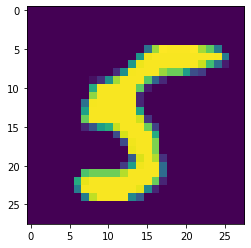

In [37]:
plt.imshow(images[0].reshape(28,28)) # (1, 28, 28)에서 (28,28)
print(images[0].shape)
print(labels[0]) # 실제값

In [40]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data\cifar-10-python.tar.gz to data
Files already downloaded and verified


In [41]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [42]:
data_iteration = iter(train_loader) # batch_size가 64이므로 64개씩 뽑힘
images, labels = data_iteration.next()

print(images.shape) # 3 : RGB
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


* transpose

torch.Size([3, 32, 32])
tensor(3)


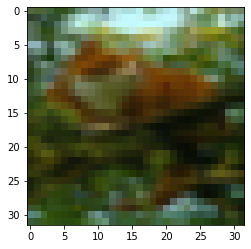

In [45]:
plt.imshow(np.transpose(images[5].numpy(), (1,2,0))) # (1,2,0) = (3,32,32)->(32,32,3)
print(images[5].shape)
print(labels[5])

### Custom 데이터 로더 만들기

* 원하는 데이터 만들기

In [46]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd

* Data는 __init__ , __len__, __getitem__로 구성되어 이를 만들어줌

In [47]:
class My_Dataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx):
        data = self.data[idx]
        label = self.labels[idx]
        sample = {"Data": data, "Class": label}
        return sample

In [48]:
# 데이터와 label 정의
data = ['New York', 'Boston', 'California', 'Boston', 'New York']
labels = [1, 2, 3, 2, 1]

# Pandas형태의 DataFrame 정의
Data_frame = pd.DataFrame({'Data': data, 'Labels': labels})

# Dataset class 정의
Data = My_Dataset(Data_frame['Data'],
                  Data_frame['Labels'])

In [49]:
# Display text and label.
print(next(iter(Data))) # iter 하나 뽑기
print('데이터 수: ', len(Data))
print('모든 데이터: ', list(DataLoader(Data)))

{'Data': 'New York', 'Class': 1}
데이터 수:  5
모든 데이터:  [{'Data': ['New York'], 'Class': tensor([1])}, {'Data': ['Boston'], 'Class': tensor([2])}, {'Data': ['California'], 'Class': tensor([3])}, {'Data': ['Boston'], 'Class': tensor([2])}, {'Data': ['New York'], 'Class': tensor([1])}]
